In [1]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='petal_length', z='petal_width',
              color='species')
fig.show()


# USANDO PCA DE SCIKITLEARN

In [21]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Datos
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
df_wine = pd.read_csv('https://bit.ly/3L1ZZI4', header=None)
df_wine.iloc[:,0]

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: 0, Length: 178, dtype: int64

In [58]:
# Separar datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X, Y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=.4,random_state=42)
# estadarizamos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std.shape, X_test_std.shape

((106, 13), (72, 13))

In [45]:
# Determinar número de componentes a conservar
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
pca.fit(X_train_std)
pca.explained_variance_, pca.explained_variance_ratio_

(array([4.66442666, 2.64762632, 1.56051685, 1.09918255, 0.85662665,
        0.50372977, 0.41800261, 0.34754603, 0.29683391, 0.24313567,
        0.22987007, 0.15233993, 0.1039725 ]),
 array([0.35541713, 0.20174221, 0.11890731, 0.08375484, 0.06527271,
        0.03838289, 0.03185071, 0.0264821 , 0.02261797, 0.0185263 ,
        0.0175155 , 0.0116079 , 0.00792243]))

En el resultado anterior, el primer arreglo nos dice, la variable 'i' captura explained_variance_[i] veces una de las variables originales, la segunda es basicamente lo mismo pero en %, es decir que la primera variable explica el 35% de la variabilidad de los datos.

In [47]:
# # gráfica con los aportes de cada componente
# import matplotlib.pyplot as plt
# tot = sum(pca.explained_variance_ratio_)
# var_exp = [ev/tot for ev in sorted(pca.explained_variance_ratio_, reverse=True)]
# cum_var_exp = np.cumsum(var_exp)
# plt.bar(range(1,14),var_exp,label='varianza individual',align='center')
# plt.step(range(1,14),cum_var_exp,where='mid',label='varianza acumulativa')
# plt.xlabel('índice de las componentes')
# plt.ylabel('Varianza')
# plt.legend(loc='best')
# plt.show()
# # print(cum_var_exp) 

# Grafica del profe pero creo que se complica de mas

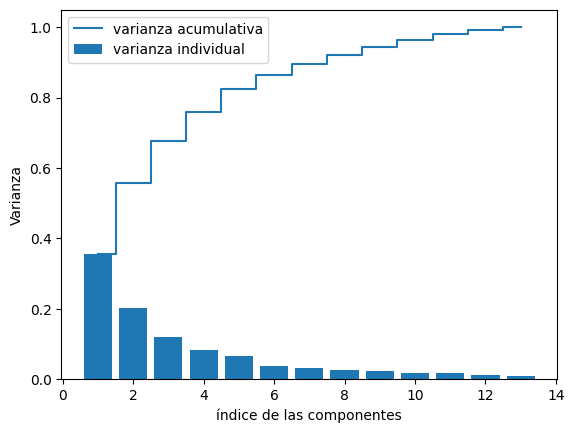

In [48]:
# gráfica con los aportes de cada componente, un poco simplificada
import matplotlib.pyplot as plt
plt.bar(range(1,14),pca.explained_variance_ratio_,label='varianza individual',align='center')
plt.step(range(1,14),np.cumsum(pca.explained_variance_ratio_),where='mid',label='varianza acumulativa')
plt.xlabel('índice de las componentes')
plt.ylabel('Varianza')
plt.legend(loc='best')
plt.show()
# print(cum_var_exp)

In [56]:
# Conservar 2 y revisar con regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression() # estas lineas en realidad no aplican nada a los datos pero crean objetos

In [59]:
# objetos de PCA y LR
# ajustar y transformar
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std) # me devuelve para cada fila 2 caracteristicas mas importantes
lr.fit(X_train_pca, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


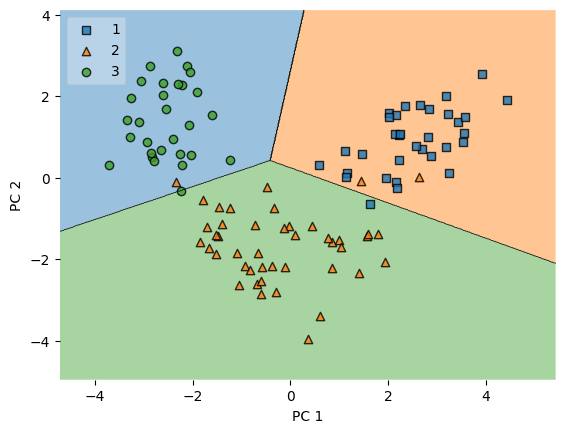

In [62]:
# Grafica del conjunto de entrenamiento
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_pca, y_train, clf=lr, legend=2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

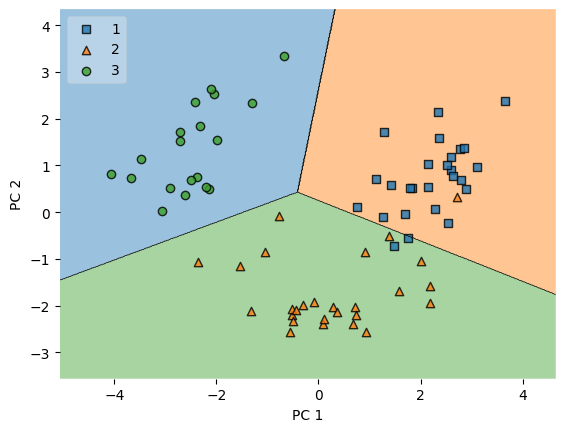

In [63]:
# Grafica del conjunto de prueba
plot_decision_regions(X_test_pca, y_test, clf=lr, legend=2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# LDA CON PYTHON

In [64]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Datos
df_wine = pd.read_csv('https://bit.ly/3L1ZZI4', header=None)

In [65]:
# Separar datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# estadarizamos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [66]:
# Revisar con regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# inicializar LDA y el modelo de RL
lda = LDA(n_components=2)
lr = LogisticRegression()
# Ajustar y transformar los datos
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr.fit(X_train_lda,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


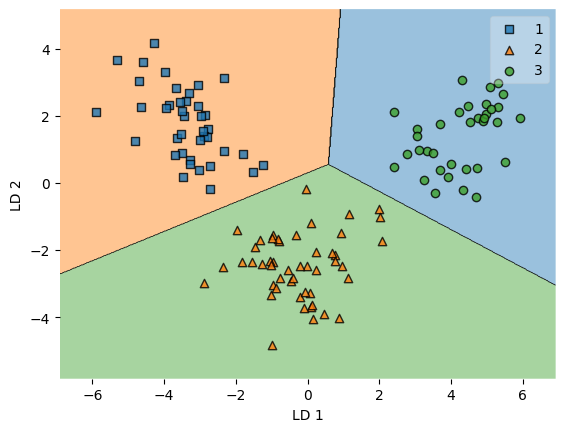

In [67]:
# Grafica del conjunto de entrenamiento
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_lda, y_train, clf=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.show()

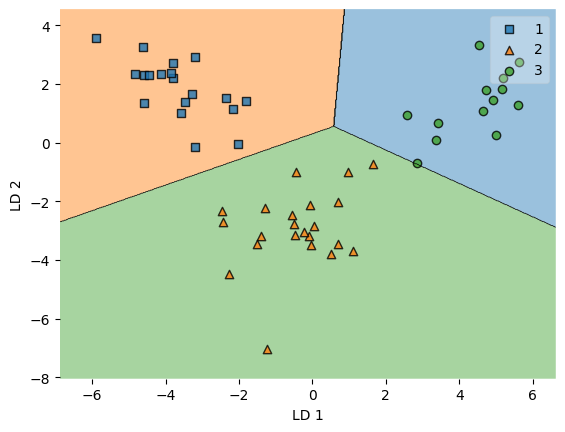

In [68]:
# Grafica del conjunto de pruebas
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, clf=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.show()